In [189]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import k_scripts.finance_scripts as fs
import k_scripts.network_scripts as ns
import k_scripts.sampler_scripts as ss
import k_scripts.measures_scripts as ms
import seaborn as sn
import importlib

importlib.reload(ns)
importlib.reload(ss)
importlib.reload(ms)

<module 'k_scripts.measures_scripts' from '/home/friday/_homescript/measures-of-uncertainty/k_scripts/measures_scripts.py'>

In [2]:
path = './data/DE/DE_17-18_close.csv'
dClose = pd.read_csv(path,index_col='Date')

In [3]:
dClose

,AAD.DE,ADS.DE,ADV.DE,AFX.DE,AIR.DE,ALV.DE,ARL.DE,BAS.DE,BAYN.DE,BC8.DE,...,SIE.DE,SIX2.DE,SKB.DE,SPR.DE,SZG.DE,SZU.DE,TEG.DE,TKA.DE,TTK.DE,UTDI.DE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,73.699997,151.300003,8.190,35.799999,62.860001,157.300003,36.040001,88.699997,98.606300,50.250000,...,117.949997,51.770000,43.125000,46.764999,33.900002,22.695000,12.595,22.955000,21.480000,37.639999
2017-01-03,73.290001,149.250000,8.122,35.480000,63.570000,159.550003,37.014999,87.699997,99.147598,49.154999,...,116.199997,51.549999,43.799999,46.615002,34.160000,22.969999,12.460,23.020000,21.355000,37.544998
2017-01-04,73.199997,146.399994,8.040,35.189999,63.430000,160.399994,37.174999,88.150002,100.427002,48.314999,...,115.699997,51.020000,42.994999,46.560001,34.185001,22.900000,12.450,22.665001,21.254999,37.220001
2017-01-05,73.680000,144.300003,7.960,35.060001,64.580002,160.699997,36.955002,87.790001,101.016998,48.174999,...,114.949997,51.250000,43.049999,46.820000,34.099998,23.245001,12.545,22.750000,22.070000,37.619999
2017-01-06,74.150002,144.800003,7.961,35.040001,65.169998,161.100006,36.669998,87.519997,100.771004,48.070000,...,115.949997,51.160000,44.264999,46.869999,33.930000,23.094999,12.425,22.625000,22.100000,38.470001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,77.139999,169.699997,6.035,51.400002,84.970001,196.250000,38.224998,93.690002,104.166000,69.750000,...,117.650002,75.989998,62.439999,66.080002,46.924999,17.389999,15.890,24.160000,18.764999,57.810001
2017-12-22,76.970001,169.399994,6.070,51.320000,84.589996,195.250000,38.110001,93.510002,103.773003,69.220001,...,117.449997,75.480003,62.480000,66.220001,46.645000,17.490000,15.690,23.930000,18.709999,58.169998
2017-12-27,76.279999,169.949997,6.068,51.820000,85.489998,194.100006,38.090000,93.589996,103.871002,69.889999,...,118.000000,76.260002,62.439999,66.040001,47.615002,17.635000,15.815,24.045000,18.730000,57.529999


In [4]:
R = fs.get_daily_returns(dClose)

In [5]:
R.head()

,AAD.DE,ADS.DE,ADV.DE,AFX.DE,AIR.DE,ALV.DE,ARL.DE,BAS.DE,BAYN.DE,BC8.DE,...,SIE.DE,SIX2.DE,SKB.DE,SPR.DE,SZG.DE,SZU.DE,TEG.DE,TKA.DE,TTK.DE,UTDI.DE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.005579,-0.013642,-0.008337,-0.008979,0.011232,0.014203,0.026694,-0.011338,0.005474,-0.022032,...,-0.014948,-0.004259,0.015531,-0.003213,0.007640,0.012044,-0.010776,0.002828,-0.005836,-0.002527
2017-01-04,-0.001229,-0.019280,-0.010147,-0.008207,-0.002205,0.005313,0.004313,0.005118,0.012821,-0.017237,...,-0.004312,-0.010334,-0.018550,-0.001181,0.000732,-0.003052,-0.000803,-0.015541,-0.004694,-0.008694
2017-01-05,0.006536,-0.014448,-0.010000,-0.003701,0.017968,0.001869,-0.005935,-0.004092,0.005858,-0.002902,...,-0.006503,0.004498,0.001278,0.005569,-0.002490,0.014953,0.007602,0.003743,0.037627,0.010690
2017-01-06,0.006359,0.003459,0.000126,-0.000571,0.009094,0.002486,-0.007742,-0.003080,-0.002438,-0.002182,...,0.008662,-0.001758,0.027832,0.001067,-0.004998,-0.006474,-0.009612,-0.005510,0.001358,0.022343
2017-01-09,0.001886,-0.002074,-0.013914,-0.010760,-0.001228,-0.004978,-0.022476,0.001598,-0.006861,0.007151,...,0.000862,-0.008835,0.008324,0.001492,-0.014397,-0.002818,-0.002821,-0.005985,0.024141,0.000779


In [6]:
R['AAD.DE'].values[:5]

array([-0.00557857, -0.00122881,  0.00653602,  0.00635869,  0.00188628])

In [7]:
R.values.T[0][:5]

array([-0.00557857, -0.00122881,  0.00653602,  0.00635869,  0.00188628])

## Пробуем в матрицу ковариаций

In [8]:
R.corr(method='pearson') # Method : {'pearson', 'kendall', 'spearman'} or callable


,AAD.DE,ADS.DE,ADV.DE,AFX.DE,AIR.DE,ALV.DE,ARL.DE,BAS.DE,BAYN.DE,BC8.DE,...,SIE.DE,SIX2.DE,SKB.DE,SPR.DE,SZG.DE,SZU.DE,TEG.DE,TKA.DE,TTK.DE,UTDI.DE
AAD.DE,1.000000,0.136479,0.026061,0.227531,0.041509,0.185758,0.034547,0.082327,0.090728,0.166336,...,0.053737,0.064224,0.163344,0.117532,0.031762,0.061694,0.089835,0.004795,0.017833,0.144215
ADS.DE,0.136479,1.000000,0.203666,0.249435,0.237355,0.338564,0.190415,0.293555,0.169813,0.246556,...,0.290341,0.224968,0.222473,0.211118,0.138705,0.073873,0.079945,0.102135,0.111215,0.120370
ADV.DE,0.026061,0.203666,1.000000,0.199307,0.280381,0.278393,0.168584,0.255594,0.190344,0.245654,...,0.244001,0.192513,0.187154,0.313718,0.192296,0.168114,0.111210,0.226336,0.194496,0.211084
AFX.DE,0.227531,0.249435,0.199307,1.000000,0.247613,0.274202,0.120096,0.328017,0.215347,0.338797,...,0.355046,0.241969,0.331127,0.179229,0.172375,0.139711,0.226218,0.133389,0.133268,0.225016
AIR.DE,0.041509,0.237355,0.280381,0.247613,1.000000,0.420621,0.233832,0.515180,0.323308,0.252976,...,0.414820,0.265063,0.249107,0.330995,0.239996,0.169455,0.117192,0.241211,0.113450,0.261381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SZU.DE,0.061694,0.073873,0.168114,0.139711,0.169455,0.226570,0.167709,0.195578,0.158166,0.073241,...,0.226770,0.168613,0.201273,0.132964,0.136915,1.000000,0.180415,0.078665,0.138081,0.181425
TEG.DE,0.089835,0.079945,0.111210,0.226218,0.117192,0.190267,0.135901,0.143759,0.128314,0.138974,...,0.143223,0.184874,0.074842,0.280724,0.034311,0.180415,1.000000,0.044764,0.289369,0.196491
TKA.DE,0.004795,0.102135,0.226336,0.133389,0.241211,0.318334,0.255421,0.376840,0.234327,0.170767,...,0.373556,0.184749,0.262221,0.108943,0.603071,0.078665,0.044764,1.000000,0.153935,0.048477
TTK.DE,0.017833,0.111215,0.194496,0.133268,0.113450,0.182585,0.185795,0.129535,0.108703,0.213300,...,0.135614,0.077712,0.180070,0.257126,0.096919,0.138081,0.289369,0.153935,1.000000,0.143420


In [9]:
R.corr(method='kendall')

,AAD.DE,ADS.DE,ADV.DE,AFX.DE,AIR.DE,ALV.DE,ARL.DE,BAS.DE,BAYN.DE,BC8.DE,...,SIE.DE,SIX2.DE,SKB.DE,SPR.DE,SZG.DE,SZU.DE,TEG.DE,TKA.DE,TTK.DE,UTDI.DE
AAD.DE,1.000000,0.115539,0.080155,0.146310,0.015110,0.095197,0.037105,0.082270,0.070528,0.115734,...,0.053429,0.076209,0.092255,0.091188,0.050937,0.052993,0.085721,0.022274,0.027696,0.116634
ADS.DE,0.115539,1.000000,0.197867,0.201486,0.189971,0.301576,0.179197,0.253966,0.164022,0.182554,...,0.241223,0.155700,0.164918,0.185549,0.124831,0.120783,0.093588,0.103713,0.120721,0.189896
ADV.DE,0.080155,0.197867,1.000000,0.234664,0.193631,0.161437,0.144756,0.180103,0.188670,0.226622,...,0.177443,0.166156,0.189567,0.170594,0.101609,0.147309,0.092539,0.126195,0.155278,0.235206
AFX.DE,0.146310,0.201486,0.234664,1.000000,0.201731,0.131082,0.068323,0.219212,0.156525,0.212624,...,0.231440,0.178794,0.218533,0.155331,0.115595,0.159068,0.182929,0.119263,0.114101,0.218036
AIR.DE,0.015110,0.189971,0.193631,0.201731,1.000000,0.288722,0.182684,0.345474,0.235751,0.205031,...,0.294200,0.186715,0.167474,0.250490,0.163102,0.126335,0.062828,0.185163,0.090221,0.251907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SZU.DE,0.052993,0.120783,0.147309,0.159068,0.126335,0.172629,0.115252,0.120533,0.127336,0.082311,...,0.189160,0.133225,0.154708,0.122163,0.118614,1.000000,0.141106,0.105656,0.094455,0.174953
TEG.DE,0.085721,0.093588,0.092539,0.182929,0.062828,0.108116,0.081767,0.078395,0.135421,0.114034,...,0.117838,0.138936,0.031837,0.179077,0.015793,0.141106,1.000000,0.059647,0.184933,0.188784
TKA.DE,0.022274,0.103713,0.126195,0.119263,0.185163,0.204856,0.199732,0.252942,0.201387,0.141825,...,0.256701,0.113915,0.193428,0.061825,0.460106,0.105656,0.059647,1.000000,0.124833,0.132233
TTK.DE,0.027696,0.120721,0.155278,0.114101,0.090221,0.111421,0.112325,0.089902,0.119044,0.173090,...,0.097506,0.056447,0.091941,0.144765,0.058653,0.094455,0.184933,0.124833,1.000000,0.130810


In [10]:
R.isna().values.sum()

0

- [x] построить матрицу ковариаций $\sigma$
- [x] сделать граф
- разные фильтрационные техники с их описанием
- **сразу пистаь скрипты для гарфония**


# Строим граф на основе матрицы

In [11]:
R = R.drop(['LIN.DE'],axis=1)

In [12]:
C = R.corr(method='pearson')

In [13]:
C.isna().values.sum()

0

In [14]:
R.isna().values.sum()

0

### Build reference network

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

Assume, that $ R_k N((0,...,0), ||\sigma||)$

хз почему с нулями, но ладно

In [16]:
C = R.corr()

In [17]:
edjes = [ (*nodes,weight) for nodes,weight in np.ndenumerate(C.values)]

In [18]:
edjes[:2]

[(0, 0, 1.0), (0, 1, 0.1364788143050599)]

In [19]:
reference_network = nx.Graph()
reference_network.add_weighted_edges_from(edjes)
reference_network.remove_edges_from(nx.selfloop_edges(reference_network))

In [20]:
type(C.values)

numpy.ndarray

In [21]:
len(reference_network.edges)

3741

# MST

In [22]:
mst = nx.minimum_spanning_tree(reference_network)

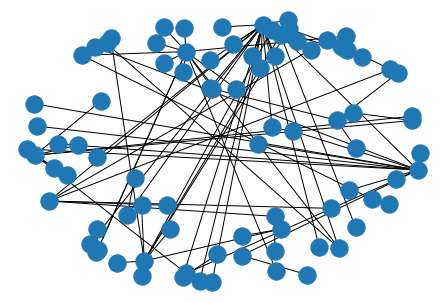

In [23]:
nx.draw(mst)

In [24]:
mst.edges(data=True)

EdgeDataView([(0, 31, {'weight': -0.06730487806021099}), (0, 72, {'weight': -0.02991916366658856}), (0, 16, {'weight': -0.02446303065258679}), (0, 24, {'weight': -0.0008374246828637565}), (0, 64, {'weight': 0.0015698599368409087}), (0, 84, {'weight': 0.004794773314200075}), (0, 76, {'weight': 0.008008678841380412}), (0, 85, {'weight': 0.017832841864513307}), (0, 61, {'weight': 0.05450025666436301}), (0, 49, {'weight': 0.05674766780837037}), (0, 20, {'weight': 0.06040602530233418}), (0, 53, {'weight': 0.09230944582875426}), (0, 52, {'weight': 0.09615927847421099}), (1, 68, {'weight': 0.025019475351397567}), (2, 70, {'weight': -0.015921927750248022}), (3, 25, {'weight': 0.001870380654718388}), (4, 32, {'weight': 0.024588211500735518}), (5, 25, {'weight': 0.031856498904060324}), (6, 44, {'weight': -0.0347451600159283}), (6, 25, {'weight': -0.008562163447751694}), (7, 54, {'weight': 0.03219625983765495}), (8, 44, {'weight': -0.03296184866971475}), (9, 57, {'weight': 0.03286257810956748}), 

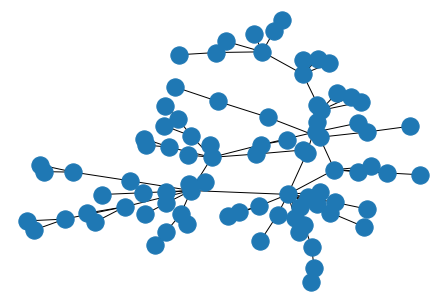

In [25]:
mxst = nx.algorithms.tree.mst.maximum_spanning_tree(reference_network)
nx.draw(mxst)

In [26]:
mxst.edges(data=True)

EdgeDataView([(0, 70, {'weight': 0.23461971224163605}), (1, 5, {'weight': 0.3385644119318261}), (1, 13, {'weight': 0.26421212483937045}), (2, 73, {'weight': 0.32360030690687136}), (3, 37, {'weight': 0.3893770106445897}), (3, 70, {'weight': 0.3659133390305761}), (4, 7, {'weight': 0.5151800067773713}), (4, 39, {'weight': 0.35258128745409795}), (4, 21, {'weight': 0.30724565884906213}), (4, 10, {'weight': 0.2595553039415311}), (5, 63, {'weight': 0.6578723927962764}), (5, 7, {'weight': 0.5996029502072845}), (5, 26, {'weight': 0.556111796184208}), (5, 22, {'weight': 0.5011238253235587}), (5, 78, {'weight': 0.3606920275971349}), (5, 18, {'weight': 0.2886938891327088}), (6, 22, {'weight': 0.5329848019128074}), (7, 77, {'weight': 0.6169849213816834}), (7, 73, {'weight': 0.5820699922213349}), (7, 58, {'weight': 0.5438886688253867}), (7, 12, {'weight': 0.5152673365662146}), (7, 45, {'weight': 0.4378060221373012}), (7, 42, {'weight': 0.40309629305229155}), (7, 60, {'weight': 0.3982973622300145}), 

In [ ]:
networkx.algorithms.tree.mst.maximum_spanning_tree

### Подумать над нодами. Мб сразу делать с названиями акций, а не цифрами?

# Sample network

Assume, that $ R_k N((0,...,0), ||\sigma||)$

Теперь надо оценить $\sigma$

In [27]:
C.shape

(87, 87)

In [30]:
N = C.shape[0]

In [31]:
a = [0]*N

Кстати, мб мы должны передавать ковариацию а не кореляцию?

In [32]:
params = (a,C)

In [33]:
Cov= R.cov()

Для сэмплирования берём матрицу ковариации!

In [35]:
np.random.multivariate_normal(a, Cov)# сэмпл доходностей всех акций за время t=t_i

array([ 1.58840608e-02,  9.14935980e-03,  6.54580149e-02, -1.22490069e-03,
       -1.45545492e-03,  7.36422904e-03, -5.39593726e-03, -2.25450565e-03,
       -1.04282156e-03,  1.77050102e-02,  1.69353392e-02, -1.14387171e-02,
       -1.50256282e-02, -1.78124310e-03, -5.74304802e-03, -1.02025269e-02,
        9.58452335e-03, -2.78781583e-03,  1.48690500e-03,  8.58770617e-04,
       -6.36935678e-03, -1.50920695e-02,  1.15354165e-02,  1.05094291e-02,
        3.38379727e-03, -5.27357720e-03, -1.90628995e-04,  2.44049432e-02,
        1.51354553e-02,  1.46961530e-02,  2.26775024e-02, -1.12628760e-02,
       -3.27496009e-02,  2.57221583e-04, -2.72412494e-03,  1.58914295e-02,
       -9.96103780e-03, -7.18852284e-04,  3.05984023e-03, -5.74105814e-03,
        1.24657370e-02, -1.66110920e-03, -2.67086318e-02, -8.62984149e-03,
        2.45291626e-02, -3.46113790e-03,  2.67517102e-05,  6.37037238e-03,
        1.87384635e-02, -3.74053050e-03,  5.54097773e-03,  8.64577915e-03,
        4.24372253e-03,  

In [35]:
n_sample = np.random.multivariate_normal(a, Cov, size = 10) # 10 сэмплов

In [36]:
n_sample.shape

(10, 87)

теперь надо посчитаь выборочную корреляцию  и составить матрицу весов

In [37]:
n_sample.shape

(10, 87)

In [38]:
R_sample = R

In [39]:
R_sample.columns

Index(['AAD.DE', 'ADS.DE', 'ADV.DE', 'AFX.DE', 'AIR.DE', 'ALV.DE', 'ARL.DE',
       'BAS.DE', 'BAYN.DE', 'BC8.DE', 'BDT.DE', 'BEI.DE', 'BMW.DE', 'BOSS.DE',
       'BVB.DE', 'BYW6.DE', 'CBK.DE', 'COK.DE', 'COM.DE', 'CON.DE', 'DAI.DE',
       'DB1.DE', 'DBK.DE', 'DEQ.DE', 'DEZ.DE', 'DLG.DE', 'DPW.DE', 'DRI.DE',
       'DTE.DE', 'DUE.DE', 'EOAN.DE', 'EVD.DE', 'EVT.DE', 'FIE.DE', 'FME.DE',
       'FNTN.DE', 'FRA.DE', 'FRE.DE', 'G1A.DE', 'GBF.DE', 'GFT.DE', 'GIL.DE',
       'GLJ.DE', 'GMM.DE', 'GSC1.DE', 'HEI.DE', 'HEN3.DE', 'HNR1.DE', 'HOT.DE',
       'IFX.DE', 'INH.DE', 'JEN.DE', 'JUN3.DE', 'KRN.DE', 'KU2.DE', 'LEO.DE',
       'LHA.DE', 'LPK.DE', 'LXS.DE', 'MAN.DE', 'MLP.DE', 'MOR.DE', 'MRK.DE',
       'MUV2.DE', 'NDA.DE', 'NEM.DE', 'PFV.DE', 'PUM.DE', 'QIA.DE', 'QSC.DE',
       'RAA.DE', 'RHK.DE', 'RWE.DE', 'SAP.DE', 'SBS.DE', 'SDF.DE', 'SGL.DE',
       'SIE.DE', 'SIX2.DE', 'SKB.DE', 'SPR.DE', 'SZG.DE', 'SZU.DE', 'TEG.DE',
       'TKA.DE', 'TTK.DE', 'UTDI.DE'],
      dtype='object')

In [108]:
R_sample = pd.DataFrame(data=n_sample, columns = R_sample.columns)

In [109]:
R.mean()

AAD.DE     0.000183
ADS.DE     0.000392
ADV.DE    -0.001201
AFX.DE     0.001451
AIR.DE     0.001126
             ...   
SZU.DE    -0.000895
TEG.DE     0.000903
TKA.DE     0.000210
TTK.DE    -0.000511
UTDI.DE    0.001657
Length: 87, dtype: float64

In [110]:
R_sample.mean()

AAD.DE    -0.009042
ADS.DE     0.000334
ADV.DE    -0.012653
AFX.DE    -0.010795
AIR.DE     0.000517
             ...   
SZU.DE    -0.006360
TEG.DE     0.001939
TKA.DE    -0.010819
TTK.DE    -0.009500
UTDI.DE   -0.002437
Length: 87, dtype: float64

In [111]:
C_sample = R_sample.corr()

In [112]:
C_sample # матрицы весов для sample-графа

,AAD.DE,ADS.DE,ADV.DE,AFX.DE,AIR.DE,ALV.DE,ARL.DE,BAS.DE,BAYN.DE,BC8.DE,...,SIE.DE,SIX2.DE,SKB.DE,SPR.DE,SZG.DE,SZU.DE,TEG.DE,TKA.DE,TTK.DE,UTDI.DE
AAD.DE,1.000000,0.109998,-0.491780,0.729413,-0.420337,0.002278,-0.264820,0.387355,0.412771,0.462011,...,0.053331,0.102927,0.345605,-0.636018,-0.177862,0.217584,-0.008173,-0.478331,-0.314612,0.047877
ADS.DE,0.109998,1.000000,0.167372,0.146942,0.469630,0.591735,0.539673,0.735805,0.186605,0.032920,...,0.568195,0.457817,0.368053,0.140692,0.402728,0.840463,0.640757,0.464035,0.068748,0.165135
ADV.DE,-0.491780,0.167372,1.000000,-0.376787,0.190693,0.446476,0.609959,-0.137698,-0.308467,0.106875,...,0.221230,0.504774,0.118848,0.547610,0.074316,0.077229,0.478662,0.691868,0.928225,0.003578
AFX.DE,0.729413,0.146942,-0.376787,1.000000,-0.082939,0.240335,-0.325597,0.577419,0.549684,0.339058,...,0.445103,0.410632,0.488743,-0.312565,-0.429509,0.169922,0.070069,-0.604683,-0.263502,0.511097
AIR.DE,-0.420337,0.469630,0.190693,-0.082939,1.000000,0.148981,-0.080253,0.341052,0.211660,-0.040109,...,0.378456,0.265369,0.009246,0.703838,0.045424,0.153253,-0.120969,0.463145,0.108813,0.489724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SZU.DE,0.217584,0.840463,0.077229,0.169922,0.153253,0.387818,0.571478,0.631570,0.208104,0.243671,...,0.264589,0.418065,0.245456,0.036165,0.484030,1.000000,0.667685,0.267714,-0.075293,-0.000692
TEG.DE,-0.008173,0.640757,0.478662,0.070069,-0.120969,0.742501,0.841461,0.405176,-0.072666,0.031605,...,0.565400,0.491418,0.427113,-0.105724,0.239621,0.667685,1.000000,0.275296,0.348353,-0.072469
TKA.DE,-0.478331,0.464035,0.691868,-0.604683,0.463145,0.369225,0.636971,0.103132,-0.162522,-0.083558,...,0.068609,0.328151,-0.049418,0.562798,0.409762,0.267714,0.275296,1.000000,0.570792,-0.215208
TTK.DE,-0.314612,0.068748,0.928225,-0.263502,0.108813,0.377199,0.411316,-0.229131,-0.375437,0.076485,...,0.149291,0.363024,0.036858,0.420763,0.092552,-0.075293,0.348353,0.570792,1.000000,-0.002757


In [122]:
np.corrcoef(R_sample.values.T)

array([[ 1.        ,  0.10999775, -0.49178008, ..., -0.47833098,
        -0.31461245,  0.04787676],
       [ 0.10999775,  1.        ,  0.16737213, ...,  0.46403542,
         0.06874773,  0.16513462],
       [-0.49178008,  0.16737213,  1.        , ...,  0.69186787,
         0.92822543,  0.00357753],
       ...,
       [-0.47833098,  0.46403542,  0.69186787, ...,  1.        ,
         0.57079162, -0.21520813],
       [-0.31461245,  0.06874773,  0.92822543, ...,  0.57079162,
         1.        , -0.00275721],
       [ 0.04787676,  0.16513462,  0.00357753, ..., -0.21520813,
        -0.00275721,  1.        ]])

In [124]:
n_sample.shape

(10, 87)

In [127]:
np.corrcoef(n_sample.T)

array([[ 1.        ,  0.10999775, -0.49178008, ..., -0.47833098,
        -0.31461245,  0.04787676],
       [ 0.10999775,  1.        ,  0.16737213, ...,  0.46403542,
         0.06874773,  0.16513462],
       [-0.49178008,  0.16737213,  1.        , ...,  0.69186787,
         0.92822543,  0.00357753],
       ...,
       [-0.47833098,  0.46403542,  0.69186787, ...,  1.        ,
         0.57079162, -0.21520813],
       [-0.31461245,  0.06874773,  0.92822543, ...,  0.57079162,
         1.        , -0.00275721],
       [ 0.04787676,  0.16513462,  0.00357753, ..., -0.21520813,
        -0.00275721,  1.        ]])

С пандасом совпадает, ура! Надо только транспонировать

Пилим sample network

In [113]:
edjes = [ (*nodes,weight) for nodes,weight in np.ndenumerate(C_sample.values)]

In [114]:
len(edjes)

7569

In [115]:
sample_network = nx.Graph()
sample_network.add_weighted_edges_from(edjes)
sample_network.remove_edges_from(nx.selfloop_edges(sample_network))

In [116]:
list(sample_network.edges(data=True))[:4]

[(0, 1, {'weight': 0.10999774738829933}),
 (0, 2, {'weight': -0.491780083945662}),
 (0, 3, {'weight': 0.7294128843838437}),
 (0, 4, {'weight': -0.4203369748621595})]

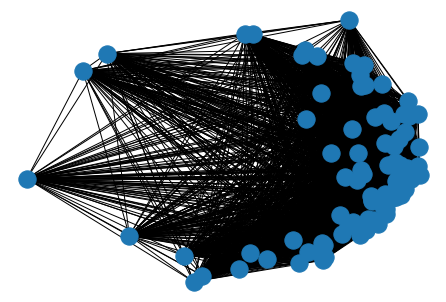

In [117]:
nx.draw(sample_network)

# Смешанное распределение

In [40]:
from scipy.stats import t  

In [ ]:
t.

Вопрос: сколько у нас степеней свободы? -- это число наблюдений - 1 (n-1) походу

In [36]:
import seaborn as sns

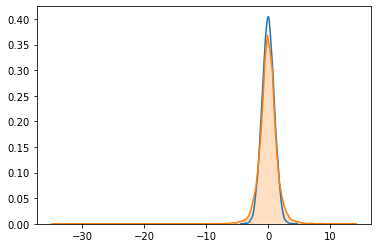

In [94]:
y_normal = np.random.standard_normal(10000)
sns.kdeplot(y_normal)

y_y = np.random.standard_t(4,10000)
sns.kdeplot(y_y,shade=True) 

### Вопрос: сколько у нас степеней свободы?

In [42]:
sample = ss.multivariate_t(means = [0]*N, df=20 ,C=C.values, n=100)

In [45]:
sample.shape

(100, 87)

In [39]:
C.values.shape

(87, 87)

# MST Uncertainty measure

In [106]:
ref_network = ns.create_network(C.values)

In [54]:
sample_net = ns.create_sample_network(ss.multivariate_t, sampler_params=[[0]*N, 20, R.cov().values,100])

In [55]:
sample_mst = ns.build_MST(sample_net)

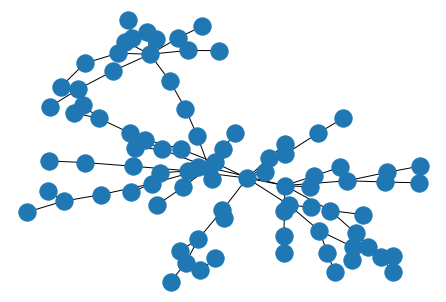

In [56]:
nx.draw(sample_mst)

In [ ]:
difference(sample_mst, ref_mst).number_of_edges()

In [68]:
G1 = nx.Graph()
G1

In [69]:
G1.add_edge(1,2)
G1.add_edge(2,3)
G1.add_edge(3,4)
G1.add_edge(4,5)

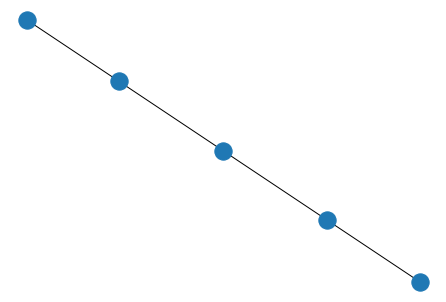

In [70]:
nx.draw(G1)

In [72]:
G2 = nx.Graph()
G2.add_edge(1,2)
G2.add_edge(2,3)
G2.add_edge(3,5)
G2.add_edge(2,5)
G2.add_edge(5,4)


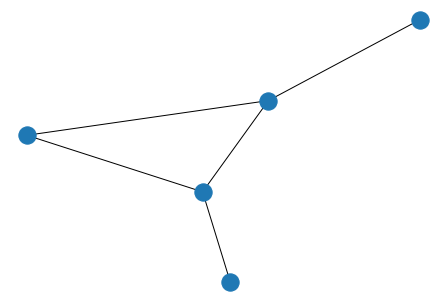

In [73]:
nx.draw(G2)

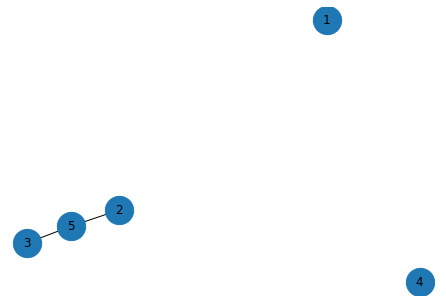

In [93]:
D=  nx.algorithms.operators.difference(G2, G1) # рёюра которые есть в G2, но нет в G1
nx.draw(D, node_size=800, with_labels=True)

In [94]:
D.number_of_edges()

2

In [111]:
ms.E_measure_MST(ref_network, sample_net)

47

# MST эксперимент

### Нормальное распределение

In [127]:
mean = [0] * N
Cov = R.cov().values

In [129]:
Cov.shape

(87, 87)

In [158]:
sampler = np.random.multivariate_normal

In [159]:
sample_network = ns.create_sample_network(sampler,  [mean, Cov,10])

In [142]:
reference_network = ns.create_network(R.corr().values)

In [160]:
ms.E_measure_MST(reference_network, sample_network)

74

In [174]:
ref_mst = ns.build_MST(ref_network)
errors = []
for i in range(1000):
    sample_network = ns.create_sample_network(sampler,  [mean, Cov,10])    
    errors.append(ms.E_measure_MST(ref_network,sample_network))

In [176]:
np.mean(errors)

0.9074883720930234

In [177]:
ref_mst = ns.build_MST(ref_network)
errors = []
for i in range(1000):
    sample_network = ns.create_sample_network(sampler,  [mean, Cov,100])    
    errors.append(ms.E_measure_MST(ref_network,sample_network))
    
np.mean(errors)   

0.6234767441860465

In [178]:
ref_mst = ns.build_MST(ref_network)
errors = []
for i in range(1000):
    sample_network = ns.create_sample_network(sampler,  [mean, Cov,3000])    
    errors.append(ms.E_measure_MST(ref_network,sample_network))
    
np.mean(errors)   

0.1971976744186046

### Ненормальное рспредление

In [179]:
n = 100
df = 100
sampler = ss.multivariate_t
params = [mean, df, Cov,n]

In [181]:
errors = []
for i in range(1000):
    sample_network = ns.create_sample_network(sampler,  params)    
    errors.append(ms.E_measure_MST(ref_network,sample_network))
    
np.mean(errors)   

0.6272093023255814

In [183]:
n = 3000
params = [mean, df, Cov,n]
errors = []
for i in range(1000):
    sample_network = ns.create_sample_network(sampler,  params)    
    errors.append(ms.E_measure_MST(ref_network,sample_network))
    
np.mean(errors)   

0.19877906976744183

### Микс

In [185]:
n = 100
df = 100
sampler = ss.mixed_t_normal
params = [mean, Cov,df,n, 0.3]


errors = []
for i in range(1000):
    sample_network = ns.create_sample_network(sampler,  params)    
    errors.append(ms.E_measure_MST(ref_network,sample_network))
    
np.mean(errors)  

0.624593023255814

In [186]:
n = 100
df = 10
sampler = ss.mixed_t_normal
params = [mean, Cov,df,n, 0.5]


errors = []
for i in range(1000):
    sample_network = ns.create_sample_network(sampler,  params)    
    errors.append(ms.E_measure_MST(ref_network,sample_network))
    
np.mean(errors)  

0.6429069767441861